# Imports

In [11]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

# Simple linear Regression

In [12]:
df = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/Data Sets/salary.csv')

In [13]:
# For X (independent variable), take all the columns from the file, except salary
X = df.drop('Salary', axis=1).values  # Drop 'Salary' and convert to NumPy array
# numpy arrays are faster to process by scikitlearn, hence .values

# For dependent variable, take only Salary
y = df['Salary']

In [14]:

# Step 2: Split data into training and testing
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=1/3, random_state=0)

In [15]:
# Step 3: Fit Simple Linear Regression to Training Data
from sklearn.linear_model import LinearRegression
regressor = LinearRegression()
regressor.fit(X_train, y_train)

LinearRegression()

In [16]:
# Step 4: Make Prediction
y_pred = regressor.predict(X_test)
print (y_pred)

[ 40835.10590871 123079.39940819  65134.55626083  63265.36777221
 115602.64545369 108125.8914992  116537.23969801  64199.96201652
  76349.68719258 100649.1375447 ]


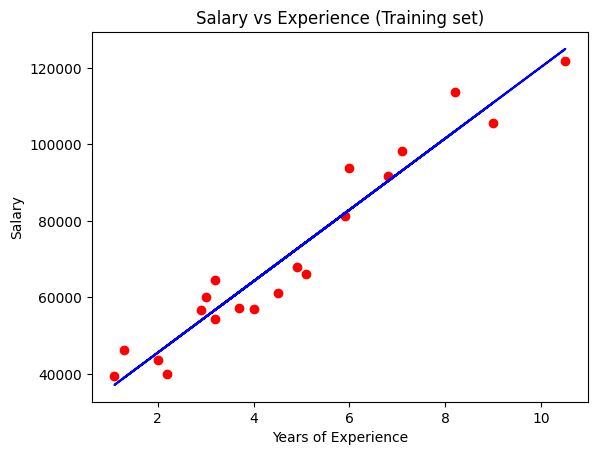

In [17]:
# Step 5 - Visualize training set results
import matplotlib.pyplot as plt
# plot the actual data points of training set
plt.scatter(X_train, y_train, color = 'red')
# plot the regression line
plt.plot(X_train, regressor.predict(X_train), color='blue')
plt.title('Salary vs Experience (Training set)')
plt.xlabel('Years of Experience')
plt.ylabel('Salary')
plt.show()

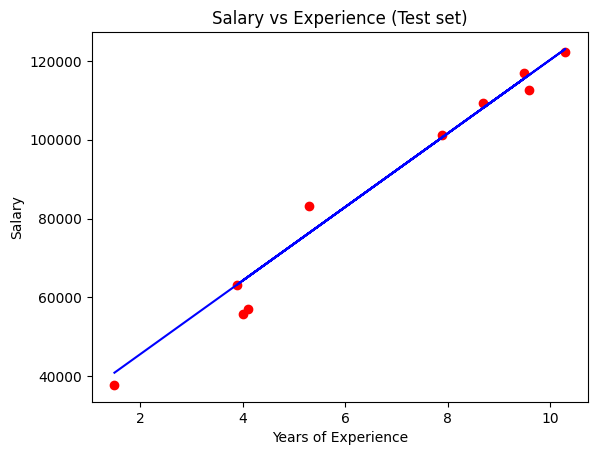

In [18]:
# Step 6 - Visualize test set results
import matplotlib.pyplot as plt
# plot the actual data points of test set
plt.scatter(X_test, y_test, color = 'red')
# plot the regression line for test set
plt.plot(X_test, regressor.predict(X_test), color='blue')
plt.title('Salary vs Experience (Test set)')
plt.xlabel('Years of Experience')
plt.ylabel('Salary')
plt.show()

In [19]:
'''
A lower MAE, MSE, and RMSE generally indicate better model performance, meaning the predictions are closer to the actual values
The high MSE value compared to MAE suggests that there might be a few instances where the model's predictions were significantly far off from the actual values
'''
# Step 7 - Make new prediction
new_salary_pred = regressor.predict([[15]])
print('The predicted salary of a person with 15 years experience is ',new_salary_pred)

# Step 8 - Intercept and Coefficient
# Intercept: Salary for "0" years of experience (What will be y-axis value if x-axis value is 0?) and coefficient: For each additional year, how much additional salary will we offer?
print("Intercept ... Fresher Salary: ", regressor.intercept_)
print("Coefficient ... Additional Salary for Each Additional Year's Experience: ", regressor.coef_)

# Evaluate results
from sklearn.metrics import mean_absolute_error,mean_squared_error
import numpy as np

MAE = mean_absolute_error(y_test,y_pred)
MSE = mean_squared_error(y_test,y_pred)
RMSE = np.sqrt(MSE)

# on average, the predictions were off by around 3426.43 units from the actual values
print(f"MAE = {MAE}")

# Squares the absolute differences between the predicted values and the actual values,
#  and then averages them - Squaring the errors gives more weight to larger errors
#  An MSE of 21026037.33 suggests that there might be some outliers or
#   significant errors in our predictions, as squaring amplifies their
#  contribution to the MSE value
print(f"MSE = {MSE}")

# Now take the square root of the MSE - It has the same units as the original data,
#   making it easier to interpret in the context of our specific problem
# An RMSE of 4585.42 implies that the average prediction error was around 4585.42 units
print(f"RMSE = {RMSE}")

The predicted salary of a person with 15 years experience is  [167005.32889087]
Intercept ... Fresher Salary:  26816.192244031183
Coefficient ... Additional Salary for Each Additional Year's Experience:  [9345.94244312]
MAE = 3426.4269374307078
MSE = 21026037.329511296
RMSE = 4585.4157204675885


# Multiple Linear Regression

In [20]:
data = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/Data Sets/Student_Performance.csv')

In [21]:
print (data.head())
print (data.info())
print (data.isnull().sum())
print (data.shape)
print (data.duplicated().sum())

   Hours Studied  Previous Scores Extracurricular Activities  Sleep Hours  \
0              7               99                        Yes            9   
1              4               82                         No            4   
2              8               51                        Yes            7   
3              5               52                        Yes            5   
4              7               75                         No            8   

   Sample Question Papers Practiced  Performance Index  
0                                 1               91.0  
1                                 2               65.0  
2                                 2               45.0  
3                                 2               36.0  
4                                 5               66.0  
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 6 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------              

In [22]:
data.drop_duplicates(inplace=True)

print(data.describe().T)

                                   count       mean        std   min   25%  \
Hours Studied                     9873.0   4.992100   2.589081   1.0   3.0   
Previous Scores                   9873.0  69.441102  17.325601  40.0  54.0   
Sleep Hours                       9873.0   6.531652   1.697683   4.0   5.0   
Sample Question Papers Practiced  9873.0   4.583004   2.867202   0.0   2.0   
Performance Index                 9873.0  55.216651  19.208570  10.0  40.0   

                                   50%   75%    max  
Hours Studied                      5.0   7.0    9.0  
Previous Scores                   69.0  85.0   99.0  
Sleep Hours                        7.0   8.0    9.0  
Sample Question Papers Practiced   5.0   7.0    9.0  
Performance Index                 55.0  70.0  100.0  


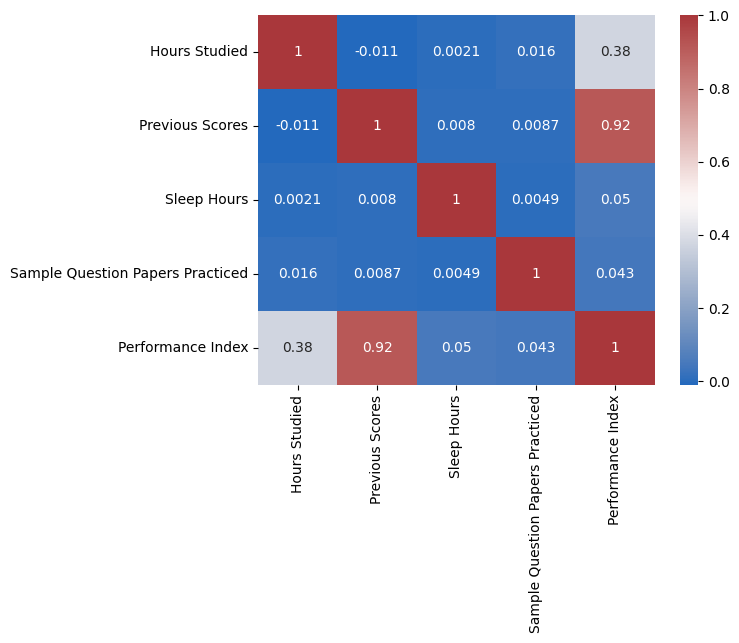

[[7 99 'Yes' 9 1]
 [4 82 'No' 4 2]
 [8 51 'Yes' 7 2]
 ...
 [6 83 'Yes' 8 5]
 [9 97 'Yes' 7 0]
 [7 74 'No' 8 1]]
[91. 65. 45. ... 74. 95. 64.]


In [23]:
# Check correlation using a heatmap
sns.heatmap(data=data.select_dtypes(exclude="object").corr(), annot=True, cmap="vlag")
plt.show()

# Prepare for training, testing split - All features in x, the predicted value in y
x = data.iloc[:,:-1].values
y = data.iloc[:,-1].values
# x will now contain Hours studied, Previous scores, Extracurricluar activities, Sleep Hours, and Sample Question Papers Practiced (Features)
# y will contain the outcome (Performance Index)

print(x)
print(y)

In [24]:
# Do one-hot encoding
from sklearn.preprocessing import LabelEncoder, OneHotEncoder
label = LabelEncoder()
x[:,2]= label.fit_transform(x[:,2])
print(x)

[[7 99 1 9 1]
 [4 82 0 4 2]
 [8 51 1 7 2]
 ...
 [6 83 1 8 5]
 [9 97 1 7 0]
 [7 74 0 8 1]]


In [25]:
# Split data into training and testing
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size = 0.2,random_state = 0)

print(y_train.shape)
print(y_test.shape)

(7898,)
(1975,)


In [26]:
# Perform linear regression
from sklearn.linear_model import LinearRegression
model = LinearRegression()
model.fit(x_train,y_train)

# Print results
pred = model.predict(x_test)
print('Train score :{} \n Test score {}'.format(model.score(x_train,y_train),model.score(x_test,y_test)))

print(pred)

Train score :0.9888967225498639 
 Test score 0.9878120360079914
[73.05054486 27.90456729 39.52609214 ... 42.51831731 34.5411674
 70.50845371]


In [27]:
# Check accuracy
from sklearn.metrics import mean_absolute_error, r2_score, mean_squared_error
print('MSE : {} \n Mean absolute error : {} \n r2_score :{}'.format( mean_squared_error(y_test,pred), mean_absolute_error(y_test,pred), r2_score(y_test,pred)))

# Create a new DF containing actual Performance Index value and predicted Performance Index value for the test set

df_compare = pd.DataFrame()
df_compare['actual'] = y_test
df_compare['predicted'] = pred

print(df_compare)

MSE : 4.490041091497724 
 Mean absolute error : 1.6911921606195814 
 r2_score :0.9878120360079914
      actual  predicted
0       74.0  73.050545
1       30.0  27.904567
2       40.0  39.526092
3       68.0  67.077412
4       63.0  61.572131
...      ...        ...
1970    19.0  19.038347
1971    53.0  56.357122
1972    43.0  42.518317
1973    33.0  34.541167
1974    67.0  70.508454

[1975 rows x 2 columns]


Correlation Coefficient: 0.9938932425502096


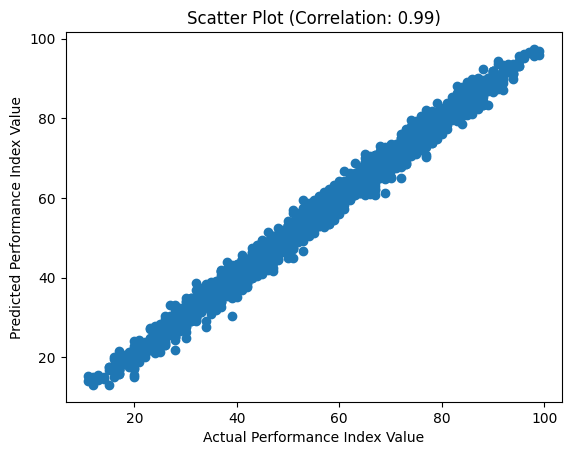

In [28]:
# Create regression plot of the actual versus predicted
correlation_coefficient = df_compare['actual'].corr(df_compare['predicted'])

print(f'Correlation Coefficient: {correlation_coefficient}')

# Plot a scatter plot to visualize the data
plt.scatter(df_compare['actual'], df_compare['predicted'])
plt.xlabel('Actual Performance Index Value')
plt.ylabel('Predicted Performance Index Value')
plt.title(f'Scatter Plot (Correlation: {correlation_coefficient:.2f})')
plt.show()